# Second-Order System

## Required imports 

In [1]:
from IPython.core.display import HTML
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "font.size": 10,
})

from sympy import *
from sympy.plotting import plot

from mathprint import *

## Preparations

Define variables that we are going to use repetitively:
$s, t, \tau$.
We also need to define specific prpoperties of the variables.

In [2]:
t   = symbols('t', real=True, positive=True)
s   = symbols('s', complex=True)
tau = symbols('tau', real=True, positive=True)
omega_n = symbols('omega_n', real=True, positive=True)
zeta = symbols('zeta', real=True, positive=True)

The original laplace transformation functions are a little too long. We will simplify the laplace and the inverse laplace transformation functions, as follows.
*  ```laplace_transform(f, t, s, noconds=True)``` as ```laplace(f)```
*  ```inverse_laplace_transform(F, s, t)``` as ```ilapalce(F)```

In [3]:
def laplace(f):
    F = laplace_transform(f, t, s, noconds=True)
    return F

def ilaplace(F):
    f = inverse_laplace_transform(F, s, t)
    return f

## Second-Order System Equation

A second-order system: 

$$ G(s)=\frac{C(s)}{R(s)} = \frac{ \omega_n^2 } { s^2+2 \zeta \omega_n s + \omega_n^2 } $$

Here $R(s)$ and $C(s)$ are the input and output functions in $s$-domain, respectively. In time-domain, they become $r(t)$ and $c(t)$, respectively. We have two parameters:
* natural frequency at which system: $\omega_n$
* damping ratio is a system: $\zeta$

In [4]:
G = omega_n**2 / (s**2 + 2*zeta*omega_n*s + omega_n**2)
mprint("G=", latex(G))

<IPython.core.display.Math object>

## Responses to a Unit-Step Input

What we do here:
* define a step function as the input function

In [5]:
r = Heaviside(t)
mprint('r(t)=', latex(r))

<IPython.core.display.Math object>

* compute the Laplace formof the input function:

In [6]:
R = laplace(r)
mprint('R(s)=', latex(R))

<IPython.core.display.Math object>

* apply the input to the system, obtain the output

In [7]:
C = G*R
mprint('C(s)=', latex(C))

<IPython.core.display.Math object>

* compute the Laplace inverse of the output

In [8]:
c = ratsimp(ilaplace(C))
mprintb('c(t)=', latex(c))

<IPython.core.display.Math object>

As $ \zeta = 1 $, $ c(t) $ becomes undfined. Hence, we must use limit operation when $\zeta = 1$.

In [9]:
cz1 = ratsimp(limit(c, zeta, 1))
mprintb('c_{\\zeta=1}(t)=', latex(cz1))

<IPython.core.display.Math object>

Let us rewrite the response equation, for $ \zeta \geq 0 $ :

$$ \boxed{ c(t) = 1 + \frac{ \left(- \zeta \sin{\left(\omega_{n} t \sqrt{1 - \zeta^{2}} \right)} \theta\left(t\right) - \sqrt{1 - \zeta^{2}} \cos{\left(\omega_{n} t \sqrt{1 - \zeta^{2}} \right)} \theta\left(t\right)\right) e^{- \omega_{n} t \zeta}}{\sqrt{1 - \zeta^{2}}}, \,\, \zeta \neq 1 } $$

$$ \boxed{ c(t) = \left(- \omega_{n} t - 1 \right) e^{- \omega_{n} t} + 1, \,\, \zeta = 1 } $$

System response is composed by 2 main components:
* Forced response:
    * DC component: $c_1(t) = 1$
* Natural response $(c_n)$, which is made by a sinusiodal component divided by an exponential component:
    * Sinusoidal component: $c_2(t) = - \zeta \sin{\left(\omega_{n} t \sqrt{1 - \zeta^{2}} \right)} \theta\left(t\right) - \sqrt{1 - \zeta^{2}} \cos{\left(\omega_{n} t \sqrt{1 - \zeta^{2}} \right)} \theta\left(t\right)$
    * Exponential component: $c_3(t) = e^{\omega_{n} t \zeta}\sqrt{1 - \zeta^{2}}$

Thus: 

$$c(t) = \underbrace{c_1(t)}_{\text{DC}} + \underbrace{c_2(t)c_3(t)}_{\large c_n}$$

In [10]:
zeta_ = 0.5   # set zeta > 0 and zeta != 1
omega_n_ = 1  # set omega_n > 0

c_lst = Add.make_args(c) # separate cn
c1 = c_lst[0]
c2 = numer(c_lst[1])
c3 = 1 / denom(c_lst[1])

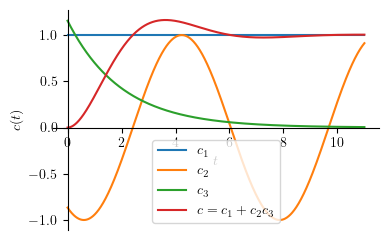

In [11]:
p1 = plot(c1.subs(([omega_n, omega_n_],[zeta, zeta_])), (t, 0, 11), size=(4, 2.5), ylabel='$c(t)$', show=False, legend=True)
p2 = plot(c2.subs(([omega_n, omega_n_],[zeta, zeta_])), (t, 0, 11), show=False, legend=True)
p3 = plot(c3.subs(([omega_n, omega_n_],[zeta, zeta_])), (t, 0, 11), show=False, legend=True)
p4 = plot( c.subs(([omega_n, omega_n_],[zeta, zeta_])), (t, 0, 11), show=False, legend=True)

p1.append(p2[0])
p1.append(p3[0])
p1.append(p4[0])

p1[0].label = "$c_1$"
p2[0].label = "$c_2$"
p3[0].label = "$c_3$"
p4[0].label = "$c = c_1 + c_2  c_3$"

p1.show()


### Peak time

Peak time is achieved when $\frac{\mathtt{d}c}{\mathtt{d}t}=0$

In [12]:
cdot = Eq(simplify(diff(c,t)), 0)
mprint(latex(cdot))

<IPython.core.display.Math object>

In [13]:
tp = solve(cdot, t)
mprintb("t_p=", latex(tp))

<IPython.core.display.Math object>

For our example, let us apply the previous numerical values to $\omega_n$ and $\zeta$.

In [14]:
tp[0].subs(([omega_n, omega_n_],[zeta, zeta_])).evalf()

3.62759872846844

### Maximum Overshoot

Maximum overshot happens at $c(t_p)$.

In [15]:
Mp = simplify(c.subs(t, tp[0])) - 1
mprintb("M_p= \\Large ", latex(Mp))

<IPython.core.display.Math object>

For our example, let us apply the previous numerical values to $\omega_n$ and $\zeta$.

In [16]:
Mp.subs(([omega_n, omega_n_],[zeta, zeta_])).evalf()

0.163033534821580

### Settling Time

Settling time happens when the output reaches a certain accuracy limit from the steady state output.

Let us take a look only at $c_2(t)$ and $c_3(t)$

In [17]:
mprint("c_2(t)=", latex(c2))
mprint("c_3(t)=", latex(c3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

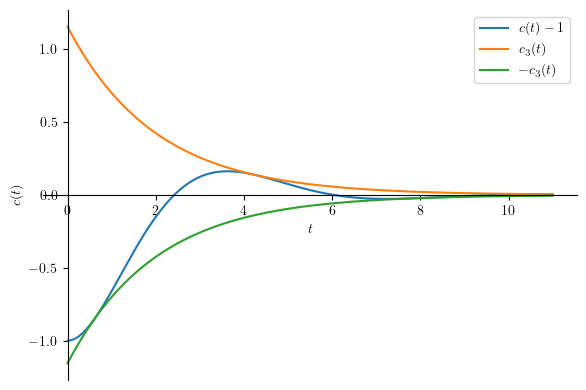

In [18]:
tspan = (t, 0, 11)

p1 = plot((c-1).subs(([omega_n, omega_n_],[zeta, zeta_])), tspan, size=(6, 4), ylabel='$c(t)$', show=False, legend=True)
p2 = plot(   c3.subs(([omega_n, omega_n_],[zeta, zeta_])), tspan, show=False, legend=True)
p3 = plot(  -c3.subs(([omega_n, omega_n_],[zeta, zeta_])), tspan, show=False, legend=True)

p1.append(p2[0])
p1.append(p3[0])

p1[0].label = "$c(t)-1$"
p2[0].label = "$c_3(t)$"
p3[0].label = "$-c_3(t)$"

p1.show()

Notice that $c_3(t)$ is the envelope of the $c1(t)-1$.

#### 2-percent settling time

In [19]:
ts = solve(Eq(c3, 0.02) , t)
ts2 = ts[0]
mprintb('t_{s2} =', latex(ts))

<IPython.core.display.Math object>

For our example, let us apply the previous numerical values to $\omega_n$ and $\zeta$.

In [20]:
ts2_ = ts2.subs(([omega_n, omega_n_],[zeta, zeta_]))
ts2_

8.11172808330807

#### 5-percent settling time

In [21]:
ts = solve(Eq(c3, 0.05) , t)
ts5 = ts[0]
mprintb('t_{s5} =', latex(ts))

<IPython.core.display.Math object>

For our example, let us apply the previous numerical values to $\omega_n$ and $\zeta$.

In [22]:
ts5_ = ts5.subs(([omega_n, omega_n_],[zeta, zeta_]))
ts5_

6.27914661955976

## Rise time

Rise time happens when $c(t_r) = 1$.

In [23]:
tr = solve(Eq(c-1, 0), t)
mprintb('t_r = ', latex(tr))

<IPython.core.display.Math object>

We take the first solution since $t_r > 0$

For our example, let us apply the previous numerical values to $\omega_n$ and $\zeta$.

In [24]:
tr[0].subs(([omega_n, omega_n_],[zeta, zeta_]))

2.41839915231229

## The effect of damping ratio

If we consider only the system's natural response: 

In [25]:
cn = c2 * c3
mprint("c_n=", latex(cn))

<IPython.core.display.Math object>

We can easily conclude that the damping ratio:
* changes system's natural frequency
* changes system's transient behaviour

The first point is quite straight forward. Thus, we will explore more on the second point.

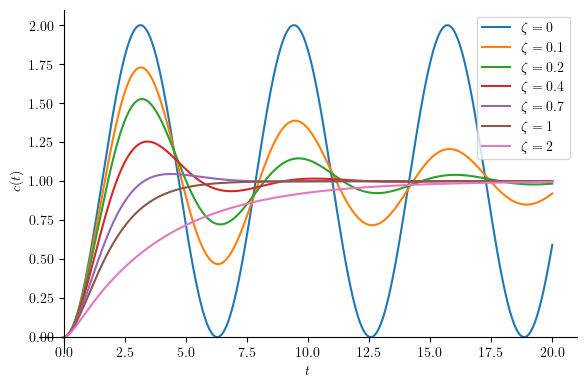

In [26]:
tspan = (t, 0, 20)
zetas = [0, 0.1, 0.2, 0.4, 0.7, 1, 2]

p1 = plot(c.subs(([omega_n, omega_n_],[zeta, zetas[0]])), tspan, size=(6, 4), ylabel='$c(t)$', show=False, legend=True)
p1[0].label = "$\\zeta = " + str(zetas[0]) + "$"

for k in range(1, len(zetas)):
    if zetas[k] != 1:
        p2 = plot(c.subs(([omega_n, omega_n_],[zeta, zetas[k]])), tspan, show=False, legend=True)    
    else:
        p2 = plot(cz1.subs(omega_n, omega_n_), tspan, show=False, legend=True)    

    p1.append(p2[0])
    p2[0].label = "$\\zeta = " + str(zetas[k]) + "$"


p1.show()

## Summary

In [27]:
from pandas import DataFrame
from IPython.display import Markdown

def makelatex(args):
    return ["$\\Large {}$".format(latex(a)) for a in args]

descs = ["Rise time", 
         "Peak time",
         "Maximum overshoot",
         "2-percent settling time",
         "5-percent settling time"]

vals  = [tr[0], tp, Mp, ts2, ts5]

dic = {'Parameters': descs, 
       'Formulas': makelatex(vals)}

df = DataFrame(dic)
Markdown(df.to_markdown(index=False))

| Parameters              | Formulas                                                                                                                        |
|:------------------------|:--------------------------------------------------------------------------------------------------------------------------------|
| Rise time               | $\Large \frac{2 \operatorname{atan}{\left(\frac{\sqrt{\zeta + 1}}{\sqrt{1 - \zeta}} \right)}}{\omega_{n} \sqrt{1 - \zeta^{2}}}$ |
| Peak time               | $\Large \left[ \frac{\pi}{\omega_{n} \sqrt{1 - \zeta^{2}}}\right]$                                                              |
| Maximum overshoot       | $\Large e^{- \frac{\pi \zeta}{\sqrt{1 - \zeta^{2}}}}$                                                                           |
| 2-percent settling time | $\Large \frac{3.91202300542815 - 0.5 \log{\left(1.0 - \zeta^{2} \right)}}{\omega_{n} \zeta}$                                    |
| 5-percent settling time | $\Large \frac{2.99573227355399 - 0.5 \log{\left(1.0 - \zeta^{2} \right)}}{\omega_{n} \zeta}$                                    |